In [11]:
import cv2 # using opencv to process image
from tqdm import tqdm  # use tqdm to know the process of the iteration

import numpy as np
import pandas as pd
import os         
import random
import matplotlib.pyplot as plt

#from densratio import densratio

import time
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from skimage import feature

In [2]:
%matplotlib inline

train_path = r'C:\Users\phuph\Desktop\Spiderdatabase\spidertrainset'
csv_path = r'C:\Users\phuph\Desktop\Spiderdatabase\spider_csv.csv'
hinh_nhen = r'C:\Users\phuph\Desktop\Spiderdatabase\New folder (2)\dangerous. (1).jpg'
#test_path = 'test'

size_img = 50

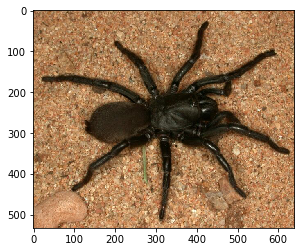

In [10]:
def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))
show_rgb_img(img);

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils


Using TensorFlow backend.


In [3]:
""" From the image, record the label either dangerous or non"""
def record_label(image_name):
    label = image_name.split('.')[0]
    if label == 'dangerous':
        return 0
    elif label == 'non':
        return 1
""" From the image, create the train data after resizing the image"""

def create_train():
    training_data = []
    for img in tqdm(os.listdir(train_path)):
        path = os.path.join(train_path, img)
        img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img_data = cv2.resize(img_data, (size_img, size_img))
        training_data.append([img_data, record_label(img) ])
    #np.save('train_data.npy', training_data)
    return training_data


In [4]:
train = create_train()
#train = create_train()

100%|██████████████████████████████████████████████████████████████████████████████| 1005/1005 [00:13<00:00, 74.98it/s]


In [5]:
A_train = []
for i in train:
    a = i[0]
    A_train.append(a)
A_train = np.asarray(A_train)
B_train = np.asarray([i[1] for i in train])

In [6]:
from sklearn.cross_validation import train_test_split
X_train0, X_test0, Y_train, Y_test = train_test_split(A_train, B_train, test_size=0.2, random_state=0)

C:\Users\phuph\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
X_feat = feature.hog(X_train0[0])
X_feat.shape

C:\Users\phuph\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


(1296,)

In [38]:
from skimage import feature
feat_df = pd.DataFrame(np.empty((X_train0.shape[0],1296)))
for i, row in enumerate(X_train0):
    X_feat = feature.hog(a)
    feat_df.iloc[i,:] = X_feat


C:\Users\phuph\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [39]:
feat_df

,0,1,2,3,4,5,6,7,8,9,...,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004265,...,0.024254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


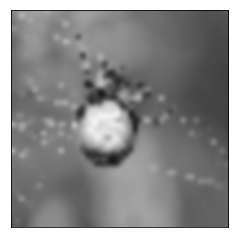

In [14]:
from matplotlib import pyplot as plt

plt.imshow(X_train0[3], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()